# Multi Resolution Permutation Procesure (MRPP)

The MRPP is a multivariate non-parametric test of whether there is a significant difference between groups within each individual variable. The MRPP provides change-corrected group agreement (A) and significance (P) values. Similar to the coefficient of determination, A ranges from 0 to 1, showing the level of discrimination between groups. Accordingly, a hypothetical A value of 1 implies that an indicator thoroughly explains the variance between clases. In contrast, an A value of 0 implies that the indicator does not explain the clases.

In [1]:
library(vegan)

Cargando paquete requerido: permute



In [38]:
load('/Volumes/Elements/Wetland_Phenology_Python/mrpp.RData')

In [24]:
setwd('/home/javierlopatin/Documentos/temp/Siusun')

In [4]:
rmse = read.csv('points_rmse.csv', header = T)
# pheno = read.csv('TSS_phen_all.csv', header = T)
lsp = read.csv('points_LSP.csv', header = T)
clusters = read.csv('cluster_phen_all.csv')
dem = read.csv('points_dem.csv')
tpi = read.csv('TPI.csv')

In [5]:
# all = cbind(clusters, pheno[,2:ncol(pheno)], rmse[,2:ncol(rmse)], lsp[,2:ncol(lsp)], dem$DEM, tpi[,2])
all = cbind(clusters, rmse[,2:ncol(rmse)], lsp[,2:ncol(lsp)], dem$DEM, tpi[,2])
all = na.omit(all)
# colnames(all) =c( "vegclass", "clusters", colnames(pheno)[2:ncol(pheno)], "rmse_all", "rmse_sos", "rmse_pos", "rmse_eos",
#                   'SOS', 'POS', 'EOS', 'vSOS', 'vPOS', 'vEOS', 'LOS', 'MSP', 'MAU', 'vMSP', 'vMAU', 'AOS', 'IOS', 'ROG', 'ROS', 'SW', "dem", "tpi") 
colnames(all) =c( "vegclass", "clusters", "rmse_all", "rmse_sos", "rmse_pos", "rmse_eos",
                  'SOS', 'POS', 'EOS', 'vSOS', 'vPOS', 'vEOS', 'LOS', 'MSP', 'MAU', 'vMSP', 'vMAU', 'AOS', 'IOS', 'ROG', 'ROS', 'SW', "dem", "tpi") 

all = na.omit(all)

all$clusters = as.factor(all$clusters)

str(all)

'data.frame':	2572 obs. of  24 variables:
 $ vegclass: Factor w/ 16 levels "Annual Grasses and Forbs",..: 13 13 13 13 13 13 13 13 13 13 ...
 $ clusters: Factor w/ 5 levels "0","1","2","3",..: 4 4 4 2 1 4 4 4 4 4 ...
 $ rmse_all: num  7.85 7.55 7.19 8.99 14.38 ...
 $ rmse_sos: num  32.6 29 32.6 20.5 30.2 ...
 $ rmse_pos: num  3.9 2.01 2.46 3.88 7.61 ...
 $ rmse_eos: num  47.74 20.06 5.11 16.89 72.88 ...
 $ SOS     : num  80.9 89 78.6 89.1 81 ...
 $ POS     : num  177 173 153 167 158 ...
 $ EOS     : num  325 318 245 258 331 ...
 $ vSOS    : num  1203 1849 1691 793 1130 ...
 $ vPOS    : num  7504 8524 8562 4373 3884 ...
 $ vEOS    : num  1470 1457 4588 1514 1492 ...
 $ LOS     : num  244 229 166 169 250 ...
 $ MSP     : num  127 127 113 124 120 ...
 $ MAU     : num  249 242 199 210 241 ...
 $ vMSP    : num  5334 6093 4984 2364 2272 ...
 $ vMAU    : num  2841 3466 7211 2936 3070 ...
 $ AOS     : num  6800 7333 7409 4088 2934 ...
 $ IOS     : num  1025750 1126375 985631 464582 650494 ...
 

In [14]:
head(all)

,vegclass,clusters,rmse_all,rmse_sos,rmse_pos,rmse_eos,SOS,POS,EOS,vSOS,⋯,MAU,vMSP,vMAU,AOS,IOS,ROG,ROS,SW,dem,tpi
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Tule-Cattail,3,7.851385,32.63096,3.896140,47.736321,80.87057,177.0662,324.7869,1202.5060,⋯,248.7252,5334.024,2841.283,6800.173,1025749.9,65.62941,-40.89175,0.2527533,1823.6305,213.00000
2,Tule-Cattail,3,7.549890,28.95659,2.009433,20.063142,89.00000,173.0000,318.0000,1848.8770,⋯,242.0000,6093.218,3466.011,7333.495,1126375.2,79.46150,-48.73224,0.1808289,2054.1077,-1.64365
3,Tule-Cattail,3,7.187965,32.63771,2.460131,5.109756,78.61936,152.6778,244.8710,1691.0969,⋯,198.6616,4984.047,7211.328,7409.140,985631.4,93.53018,-43.86690,-0.6824750,2186.7802,34.79442
4,Tule-Cattail,1,8.988967,20.48287,3.884497,16.885301,89.13319,166.6149,258.1697,793.4783,⋯,210.2925,2364.427,2936.376,4088.157,464582.1,46.15378,-30.38030,-0.1585804,1661.1287,-38.18615
6,Tule-Cattail,0,14.383717,30.19954,7.608656,72.879587,81.00000,158.0000,331.3791,1129.5296,⋯,241.3389,2271.550,3070.493,2933.663,650493.9,35.77537,-13.78752,-0.4024138,-196.6292,-43.28105
7,Tule-Cattail,3,8.335444,20.42485,2.195180,30.690648,89.00000,175.1976,325.0000,1502.7268,⋯,249.0000,5462.123,2402.663,6412.117,956641.3,67.83360,-41.18478,0.2692295,2016.8529,-16.36991


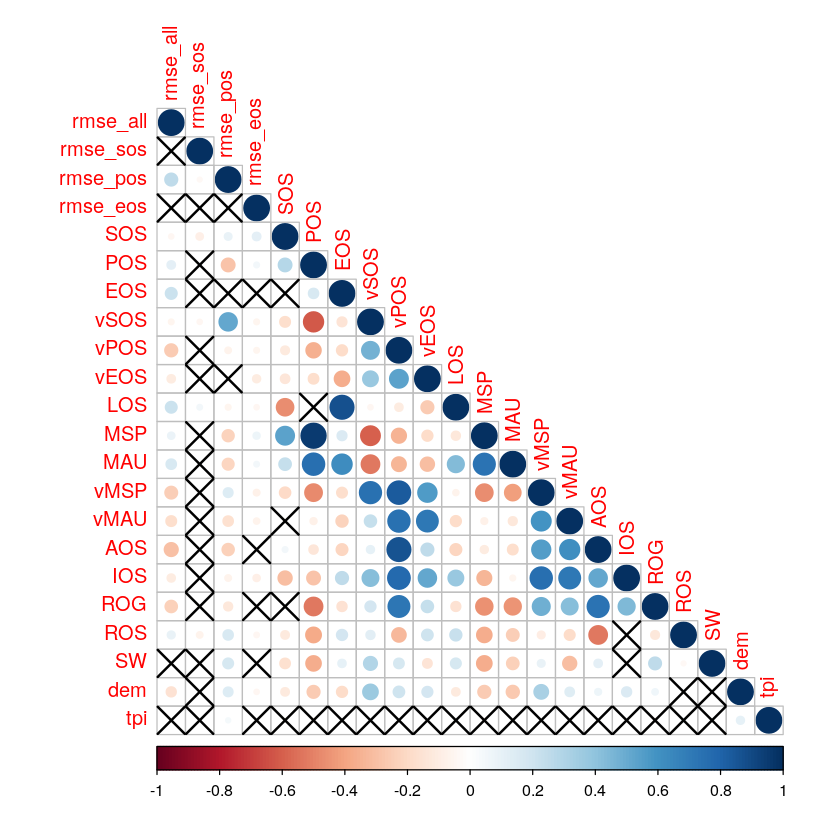

In [51]:
# install.packages('corrplot')
require('corrplot')

# colnames(all[,3:ncol(all)])
M = cor(all[,3:ncol(all)])
testRes = cor.mtest(all[,3:ncol(all)], conf.level = 0.95)

corrplot(M, p.mat = testRes$p, sig.level = 0.05, addrect = 2, type="lower")

In [15]:
# create empty matrices
mat_veg  = matrix(NA, ncol=ncol(all)-2, nrow=2)
colnames(mat_veg) = colnames(all)[3:ncol(all)]
rownames(mat_veg) = c("A", "P")

mat_clust  = matrix(NA, ncol=ncol(all)-2, nrow=2)
colnames(mat_clust) = colnames(all)[3:ncol(all)]
rownames(mat_clust) = c("A", "P")

In [18]:
# run MRPP through the variables
MRPP <- function(X, Y, mat, num_cores = 6){
    pb <- txtProgressBar(min = 0, max = ncol(all), style = 3,  width = 50, char = "=") # progress bar
    length = ncol(X)
    for(i in 1:length){
      obj_mrpp = mrpp(dat = X[,i], grouping = Y, parallel = num_cores, distance = "mahalanobis")
      mat[1,i] = obj_mrpp$A
      mat[2,i] = obj_mrpp$Pvalue
      setTxtProgressBar(pb, i)
    }
    close(pb) # close progress bar
    return(mat)
}

## Calculate for original vegetation types and clusters

In [19]:
# vegetation types
mrpp_veg = MRPP(all[,3:ncol(all)], all$vegclass, mat_veg)
mrpp_veg

  |==============================================    |  92%


,rmse_all,rmse_sos,rmse_pos,rmse_eos,SOS,POS,EOS,vSOS,vPOS,vEOS,⋯,MAU,vMSP,vMAU,AOS,IOS,ROG,ROS,SW,dem,tpi
A,0.04559655,0.008169716,0.06171752,0.0130357,0.04830899,0.1131002,0.02264656,0.1808167,0.06329915,0.08127387,⋯,0.0839551,0.1188777,0.04470523,0.03227999,0.09254961,0.04328615,0.03668732,0.04194716,0.2065258,0.01389629
P,0.00100000,0.002000000,0.00100000,0.0010000,0.00100000,0.0010000,0.00100000,0.0010000,0.00100000,0.00100000,⋯,0.0010000,0.0010000,0.00100000,0.00100000,0.00100000,0.00100000,0.00100000,0.00100000,0.0010000,0.00100000


In [20]:
# phenology types
mrpp_clust = MRPP(all[,3:ncol(all)], all$clusters, mat_clust)
mrpp_clust

  |==============================================    |  92%


,rmse_all,rmse_sos,rmse_pos,rmse_eos,SOS,POS,EOS,vSOS,vPOS,vEOS,⋯,MAU,vMSP,vMAU,AOS,IOS,ROG,ROS,SW,dem,tpi
A,0.03103616,0.007343752,0.08816704,0.02749236,0.05102985,0.2016369,0.02539976,0.3748512,0.3823349,0.310739,⋯,0.141487,0.4207446,0.3887799,0.1753231,0.3851342,0.1197411,0.05068783,0.1174107,0.08282906,0.0005622185
P,0.00100000,0.001000000,0.00100000,0.00100000,0.00100000,0.0010000,0.00100000,0.0010000,0.0010000,0.001000,⋯,0.001000,0.0010000,0.0010000,0.0010000,0.0010000,0.0010000,0.00100000,0.0010000,0.00100000,0.1340000000


In [21]:
save.image('mrpp.RData')

In [39]:
# functions to plot the relatve importance using inferno colors
library("viridis")  

# add coefficients
colorpal <-  inferno(100)

varImp <- function(varImport = mrpp_lsp){
   # variables from ensemble
    imp <- varImport

    # matices of varImport
    z1 <- matrix (rep (imp, 100), ncol=100)

    # MRFF coefficients
    wl = seq(length(imp))
    #image(wl, seq(0, 100, 1), z1, xlim = c(min(wl)-10, max(wl)+10), xlab=expression(lambda(nm)), col=blueish, ylab="", axes=F, cex.lab = 1.3)
    image(wl, seq(0, 100, 1), z1, xlim = c(min(wl)-10, max(wl)+10), xlab="", col=colorpal  , ylab="", axes=F, cex.lab = 1.3)    
}

In [24]:
svg('mrpp_veg.svg')
varImp(mrpp_veg[1, ])
dev.off()

png 
  2

In [26]:
svg('mrpp_clust.svg')
varImp(mrpp_clust[1, ])
dev.off()

png 
  2

# Variable importance using PLS-DA

We determined the contribution of each indicator to discern the vegetation and phenology classes by applying using Partial Least Squares Discriminant Analysis (PLS-DA) with a bootstrapping iteration procedure, wherein each iteration (100) we:

- Fitted a general model using all indicators and observations available and stored the overall Kappa (Kall) value;
- Fitted a indicator-wise partial models by randomizing the values of one indicator at the time in a stepwise procedure, storing one K value for each indicator replacement (Ki);
- Estimated the relative contribution of each indicator by subtracting the indicator-wise partial model from the overall model (Kall ₋ Ki), generating a delta Kappa per indicator (ΔK).

We used on average 63% samples for model training and 37% for validation during each iteration. We used PLS models on the training samples using a 5-fold cross-validation approach. We stored the results of the 100 iterations to present the distribution of ΔK and prevent stochastic biases (Kattenborn et al., 2019)

In [39]:
head(all)

,PFT,cluster,PC1,PC2,PC3,sos,pos,eos,vsos,vpos,...,X49,X50,X51,X52,dem,rmse,rmse_sos,rmse_pos,rmse_eos,dem$dem
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,3,0.18589912,0.32966588,0.34168977,223,322,343,0.4220110,0.6502481,...,0.6241659,0.6189461,0.6132410,0.6132410,17,0.005427294,0.002906947,0,0.005426997,17
2,6,2,-0.11685316,0.36236954,-0.18376944,117,174,273,0.8122451,1.5289753,...,1.1567992,1.1567992,1.1567992,1.1567992,915,0.001504907,0.001114484,0,0.001504907,915
3,5,5,-0.13590558,-0.27133913,0.26147229,75,188,280,0.8277662,1.0636373,...,0.4352717,0.4229671,0.4013504,0.3945998,197,0.004530196,0.004465680,0,0.004112449,197
4,5,6,0.34636412,0.13223230,0.33915716,40,103,223,0.4440235,1.0422162,...,0.5064154,0.4810964,0.8797666,0.1366950,708,0.012882821,0.012882453,0,0.011398098,708
6,6,5,-0.43486494,0.06432336,0.25328770,146,245,308,0.7556013,1.2968409,...,0.6698824,0.6206041,0.5941109,0.5271422,1904,0.014296202,0.012986997,0,0.014066687,1904
7,5,7,-0.02496119,-0.42279549,0.05961378,89,139,252,0.9509176,1.1818121,...,0.5158064,0.5158064,0.5158064,0.5158064,-491,0.007355857,0.007304813,0,0.006849735,-491


In [40]:
library(dplyr)
all <- all %>%
  select(-matches("X"), -matches("PC"))

head(all)

,PFT,cluster,sos,pos,eos,vsos,vpos,veos,los,msp,...,ios,rog,ros,sw,dem,rmse,rmse_sos,rmse_pos,rmse_eos,dem$dem
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,3,223,322,343,0.4220110,0.6502481,0.6241659,120,273,...,56.65134,0.002305425,-0.001242009,0.39649592,17,0.005427294,0.002906947,0,0.005426997,17
2,6,2,117,174,273,0.8122451,1.5289753,1.1567992,156,146,...,187.80035,0.012574213,-0.003759354,0.01875179,915,0.001504907,0.001114484,0,0.001504907,915
3,5,5,75,188,280,0.8277662,1.0636373,0.7636724,205,132,...,176.38254,0.002087356,-0.003260488,0.06977835,197,0.004530196,0.004465680,0,0.004112449,197
4,5,6,40,103,223,0.4440235,1.0422162,0.5828458,183,68,...,118.22215,0.009495123,-0.003828087,0.12719222,708,0.012882821,0.012882453,0,0.011398098,708
6,6,5,146,245,308,0.7556013,1.2968409,0.9650540,162,195,...,154.95334,0.005467066,-0.005266459,0.28049868,1904,0.014296202,0.012986997,0,0.014066687,1904
7,5,7,89,139,252,0.9509176,1.1818121,0.7475617,163,117,...,147.63755,0.004617889,-0.003842923,0.03280931,-491,0.007355857,0.007304813,0,0.006849735,-491


In [45]:
# 
#all <- all %>% filter(PFT != 8)
table(all$PFT)
# delete rows with PFT 8 (open water)
# eliminar clase 8 ("open water")
all <- all %>% filter(PFT != 8)
all$PFT <- droplevels(as.factor(all$PFT))
# confirmar
table(all$PFT)



   1    3    4    5    6    8    9 
 743   76   26 2446 1371    0   80 


   1    3    4    5    6    9 
 743   76   26 2446 1371   80 

In [46]:
library(caret)

tr_control <- trainControl(method = 'cv', number = 10, savePredictions = "final")

# data split in train/test with datapartition
set.seed(42)
idx <- createDataPartition(all$PFT, p = 0.7, list = FALSE)
train_data <- all[idx, ]
test_data <- all[-idx, ]

# train model using vegetation clases
PLS_veg <- train(x=train_data[,3:ncol(train_data)], y=train_data$PFT , method = "pls",  tuneLength=20, 
               trControl = tr_control, preProcess = c("center", "scale"), 
               metric = "Accuracy", maximize = T, na.action=na.omit)
PLS_veg

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in p

Partial Least Squares 

3323 samples
  22 predictor
   6 classes: '1', '3', '4', '5', '6', '9' 

Pre-processing: centered (22), scaled (22) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2991, 2992, 2990, 2990, 2991, 2990, ... 
Resampling results across tuning parameters:

  ncomp  Accuracy   Kappa    
   1     0.5795825  0.2048708
   2     0.6295420  0.3521111
   3     0.6316514  0.3614906
   4     0.6304547  0.3550618
   5     0.6379704  0.3693821
   6     0.6409851  0.3808973
   7     0.6448990  0.3896340
   8     0.6530143  0.4030919
   9     0.6647678  0.4281654
  10     0.6680765  0.4346295
  11     0.6695825  0.4382776
  12     0.6750043  0.4483233
  13     0.6719886  0.4430568
  14     0.6777051  0.4542805
  15     0.6771055  0.4542550
  16     0.6828175  0.4639970
  17     0.6834172  0.4647459
  18     0.6828157  0.4644311
  19     0.6837166  0.4658587
  20     0.6792103  0.4584277

Accuracy was used to select the optimal model using the largest value.
The fi

In [48]:
PLS_veg <- update(PLS_veg, param = list(ncomp = 10))

Warning message in pre_process_options(method, column_types):
"The following pre-processing methods were eliminated: 'ignore'"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"


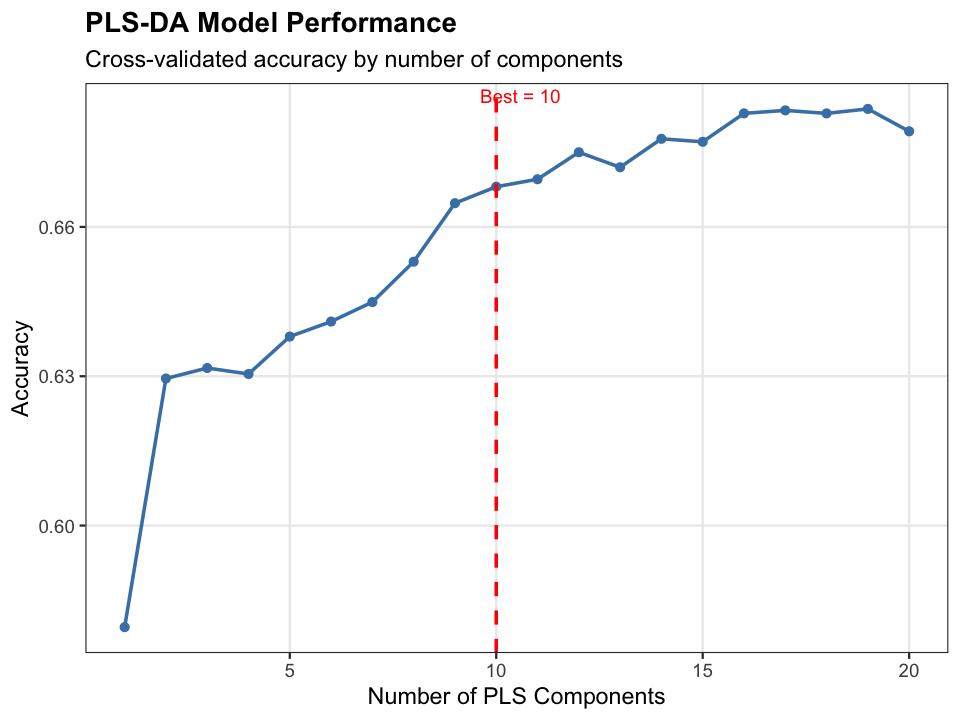

In [49]:
library(ggplot2)

# Extract results
res <- PLS_veg$results
best <- PLS_veg$bestTune$ncomp

# Plot with ggplot2
ggplot(res, aes(x = ncomp, y = Accuracy)) +
  geom_line(color = "steelblue", linewidth = 1) +
  geom_point(color = "steelblue", size = 2) +
  geom_vline(xintercept = best, color = "red", linetype = "dashed", linewidth = 1) +
  annotate("text", x = best, y = max(res$Accuracy), label = paste("Best =", best),
           color = "red", vjust = -0.5, hjust = 0.2, size = 4) +
  theme_bw(base_size = 14) +
  labs(
    x = "Number of PLS Components",
    y = "Accuracy",
    title = "PLS-DA Model Performance",
    subtitle = "Cross-validated accuracy by number of components"
  ) +
  theme(
    panel.grid.minor = element_blank(),
    plot.title = element_text(face = "bold")
  )
#ggsave("/Users/javierlopatin/Documents/GitHub/Wetland_Phenology_Python/outputs/PLS_ncomp.png", width = 8, height = 6, dpi = 300)


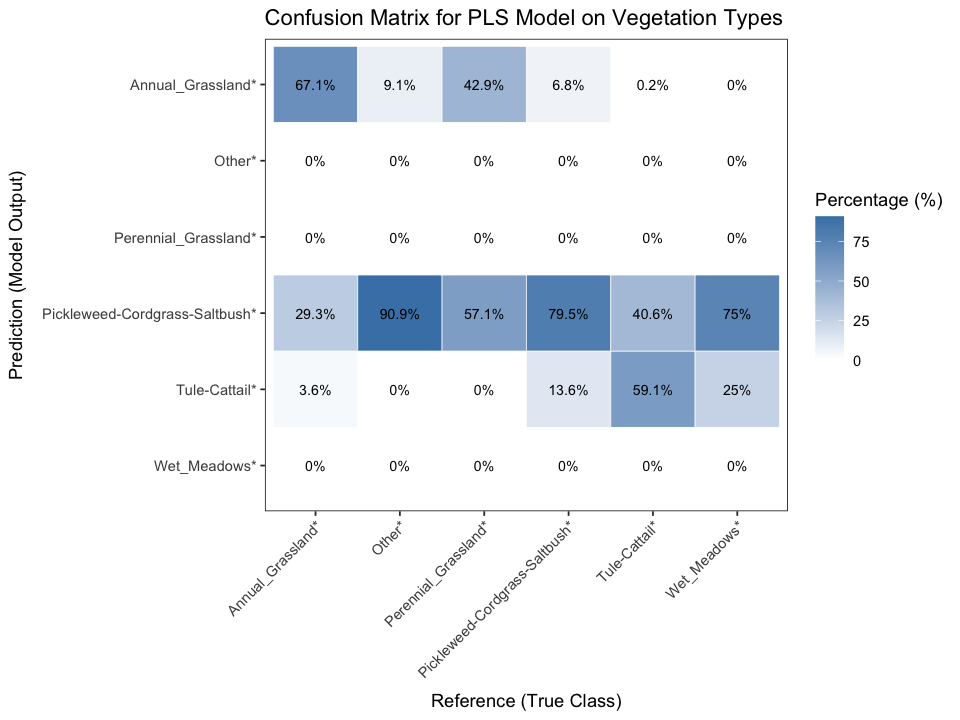

In [51]:
# predinct to test data
pred_veg <- predict(PLS_veg, newdata = test_data[,3:ncol(test_data)])

# Confusion matrix
cmat <- as.data.frame(confusionMatrix(pred_veg, test_data$PFT)$table)
colnames(cmat) <- c("Prediction", "Reference", "Freq")

# Convert factors to numeric or character (to match V1)
cmat$Reference <- as.integer(as.character(cmat$Reference))
cmat$Prediction <- as.integer(as.character(cmat$Prediction))

PFT_names <- read.csv('/Users/javierlopatin/Documents/GitHub/Wetland_Phenology_Python/data/PFT_Classes_Info.txt',sep = "", header = F)

# Join readable names for Reference and Prediction
cmat <- cmat %>%
  left_join(PFT_names, by = c("Reference" = "V1")) %>%
  rename(Reference_name = V2) %>%
  left_join(PFT_names, by = c("Prediction" = "V1")) %>%
  rename(Prediction_name = V2)

# Calculate percentages within each Reference class
cmat <- cmat %>%
  group_by(Reference_name) %>%
  mutate(Percentage = round(100 * Freq / sum(Freq), 1)) %>%
  ungroup()

# Order axes consistently
cmat$Reference_name  <- factor(cmat$Reference_name,  levels = PFT_names$V2)
cmat$Prediction_name <- factor(cmat$Prediction_name, levels = rev(PFT_names$V2))

# Plot heatmap
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data = cmat, aes(x = Reference_name, y = Prediction_name)) +
  geom_tile(aes(fill = Percentage), color = "white") +
  scale_fill_gradient(low = "white", high = "steelblue", name = "Percentage (%)") +
  geom_text(aes(label = paste0(Percentage, "%")), vjust = 0.5, size = 3) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text.y = element_text(hjust = 1),
    panel.grid = element_blank()
  ) +
  labs(x = "Reference (True Class)", y = "Prediction (Model Output)") +
  ggtitle("Confusion Matrix for PLS Model on Vegetation Types")
  # save plot
  ggsave("/Users/javierlopatin/Documents/GitHub/Wetland_Phenology_Python/outputs/confusion_matrix_veg.png", width = 8, height = 6, dpi = 300)

### Test also with Random Forest and Support Vector Machines

In [52]:
# train model using vegetation clases
RF_veg <- train(x=train_data[,3:ncol(train_data)], y=train_data$PFT , method = "rf",  tuneLength=10, 
               trControl = tr_control, preProcess = c("center", "scale"), 
               metric = "Accuracy", maximize = T, na.action=na.omit)
RF_veg

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in p

Random Forest 

3323 samples
  22 predictor
   6 classes: '1', '3', '4', '5', '6', '9' 

Pre-processing: centered (22), scaled (22) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2990, 2990, 2990, 2990, 2993, 2990, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.7228657  0.5308941
   4    0.7294695  0.5436392
   6    0.7318828  0.5481188
   8    0.7264566  0.5390474
  10    0.7258614  0.5375793
  13    0.7294750  0.5442231
  15    0.7267650  0.5400632
  17    0.7306826  0.5465130
  19    0.7303732  0.5460148
  22    0.7279708  0.5422395

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 6.

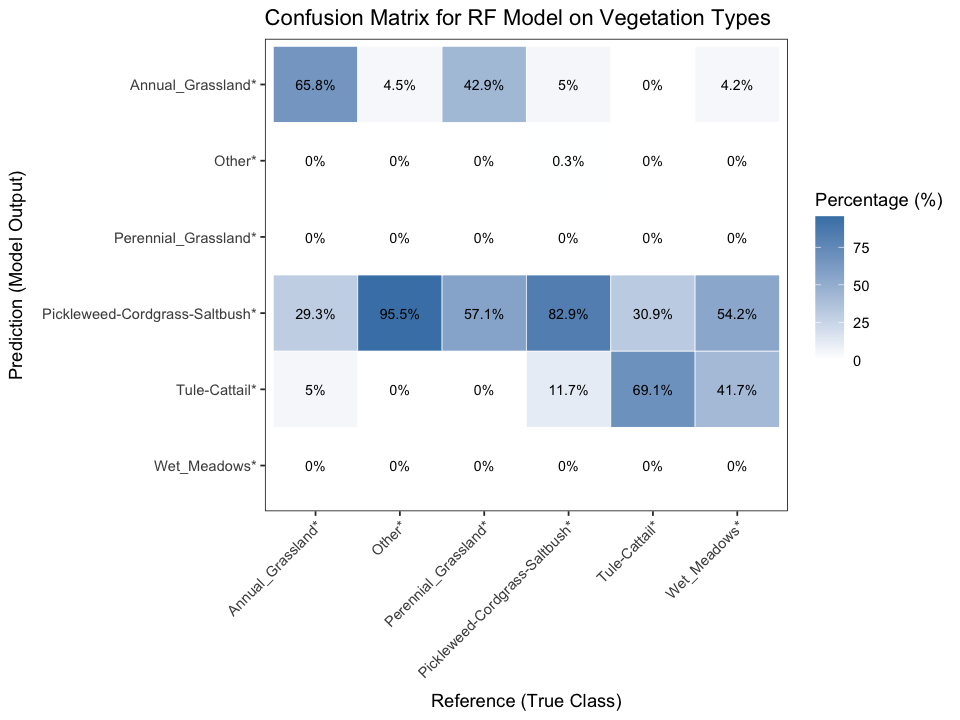

In [56]:
# predinct to test data
pred_veg_rf <- predict(RF_veg, newdata = test_data[,3:ncol(test_data)])

# Confusion matrix
cmat <- as.data.frame(confusionMatrix(pred_veg_rf, test_data$PFT)$table)
colnames(cmat) <- c("Prediction", "Reference", "Freq")

# Convert factors to numeric or character (to match V1)
cmat$Reference <- as.integer(as.character(cmat$Reference))
cmat$Prediction <- as.integer(as.character(cmat$Prediction))

PFT_names <- read.csv('/Users/javierlopatin/Documents/GitHub/Wetland_Phenology_Python/data/PFT_Classes_Info.txt',sep = "", header = F)

# Join readable names for Reference and Prediction
cmat <- cmat %>%
  left_join(PFT_names, by = c("Reference" = "V1")) %>%
  rename(Reference_name = V2) %>%
  left_join(PFT_names, by = c("Prediction" = "V1")) %>%
  rename(Prediction_name = V2)

# Calculate percentages within each Reference class
cmat <- cmat %>%
  group_by(Reference_name) %>%
  mutate(Percentage = round(100 * Freq / sum(Freq), 1)) %>%
  ungroup()

# Order axes consistently
cmat$Reference_name  <- factor(cmat$Reference_name,  levels = PFT_names$V2)
cmat$Prediction_name <- factor(cmat$Prediction_name, levels = rev(PFT_names$V2))

# Plot heatmap
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data = cmat, aes(x = Reference_name, y = Prediction_name)) +
  geom_tile(aes(fill = Percentage), color = "white") +
  scale_fill_gradient(low = "white", high = "steelblue", name = "Percentage (%)") +
  geom_text(aes(label = paste0(Percentage, "%")), vjust = 0.5, size = 3) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text.y = element_text(hjust = 1),
    panel.grid = element_blank()
  ) +
  labs(x = "Reference (True Class)", y = "Prediction (Model Output)") +
  ggtitle("Confusion Matrix for RF Model on Vegetation Types")

In [54]:
# train model using vegetation clases
SVM_veg <- train(x=train_data[,3:ncol(train_data)], y=train_data$PFT , method = "svmRadial",  tuneLength=20, 
               trControl = tr_control, preProcess = c("center", "scale"), 
               metric = "Accuracy", maximize = T, na.action=na.omit)
SVM_veg

Warning message in preProcess.default(method = c("center", "scale"), x = structure(list(:
"These variables have zero variances: rmse_pos"
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: rmse_pos"
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero

Support Vector Machines with Radial Basis Function Kernel 

3323 samples
  22 predictor
   6 classes: '1', '3', '4', '5', '6', '9' 

Pre-processing: centered (22), scaled (22) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2992, 2989, 2991, 2989, 2991, 2991, ... 
Resampling results across tuning parameters:

  C          Accuracy   Kappa    
       0.25  0.7098613  0.5050684
       0.50  0.7195017  0.5240691
       1.00  0.7261328  0.5361608
       2.00  0.7285361  0.5411261
       4.00  0.7258297  0.5376813
       8.00  0.7252372  0.5388071
      16.00  0.7240324  0.5390712
      32.00  0.7189246  0.5342029
      64.00  0.7014853  0.5109345
     128.00  0.6930352  0.5012917
     256.00  0.6764987  0.4805971
     512.00  0.6674544  0.4700333
    1024.00  0.6524023  0.4489529
    2048.00  0.6406724  0.4335192
    4096.00  0.6358748  0.4255244
    8192.00  0.6295531  0.4151406
   16384.00  0.6193175  0.4001179
   32768.00  0.6199135  0.4007173
   65536.00  0.6202102  0.

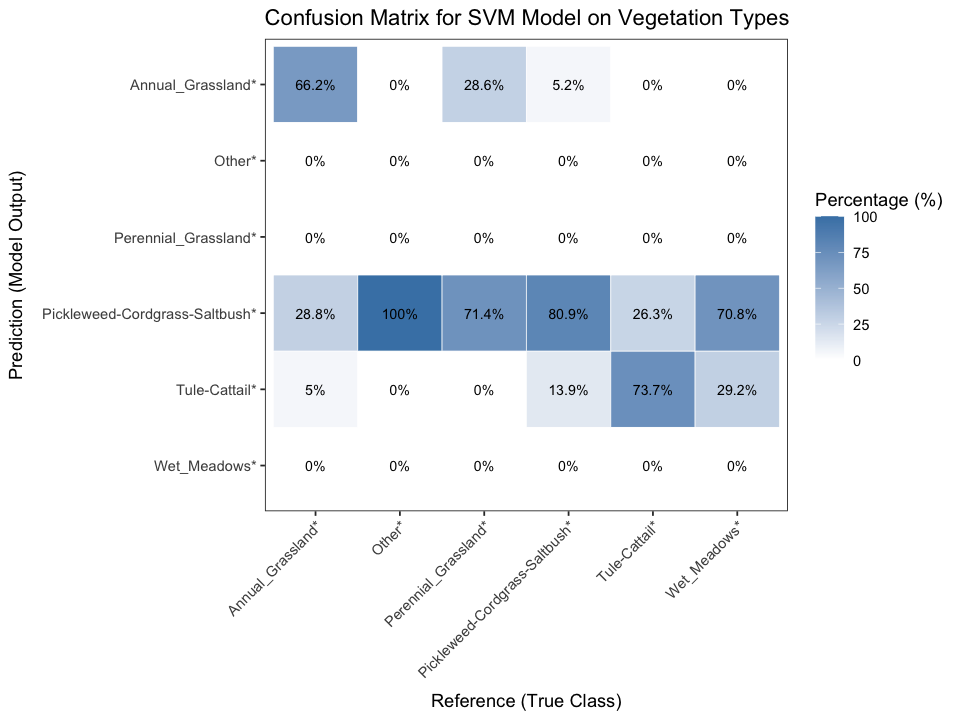

In [57]:
# predinct to test data
pred_veg_svm <- predict(SVM_veg, newdata = test_data[,3:ncol(test_data)])

# Confusion matrix
cmat <- as.data.frame(confusionMatrix(pred_veg_svm, test_data$PFT)$table)
colnames(cmat) <- c("Prediction", "Reference", "Freq")

# Convert factors to numeric or character (to match V1)
cmat$Reference <- as.integer(as.character(cmat$Reference))
cmat$Prediction <- as.integer(as.character(cmat$Prediction))

PFT_names <- read.csv('/Users/javierlopatin/Documents/GitHub/Wetland_Phenology_Python/data/PFT_Classes_Info.txt',sep = "", header = F)

# Join readable names for Reference and Prediction
cmat <- cmat %>%
  left_join(PFT_names, by = c("Reference" = "V1")) %>%
  rename(Reference_name = V2) %>%
  left_join(PFT_names, by = c("Prediction" = "V1")) %>%
  rename(Prediction_name = V2)

# Calculate percentages within each Reference class
cmat <- cmat %>%
  group_by(Reference_name) %>%
  mutate(Percentage = round(100 * Freq / sum(Freq), 1)) %>%
  ungroup()

# Order axes consistently
cmat$Reference_name  <- factor(cmat$Reference_name,  levels = PFT_names$V2)
cmat$Prediction_name <- factor(cmat$Prediction_name, levels = rev(PFT_names$V2))

# Plot heatmap
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data = cmat, aes(x = Reference_name, y = Prediction_name)) +
  geom_tile(aes(fill = Percentage), color = "white") +
  scale_fill_gradient(low = "white", high = "steelblue", name = "Percentage (%)") +
  geom_text(aes(label = paste0(Percentage, "%")), vjust = 0.5, size = 3) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text.y = element_text(hjust = 1),
    panel.grid = element_blank()
  ) +
  labs(x = "Reference (True Class)", y = "Prediction (Model Output)") +
  ggtitle("Confusion Matrix for SVM Model on Vegetation Types")

In [55]:
# predinct to test data
pred_veg_rf <- predict(RF_veg, newdata = test_data[,3:ncol(test_data)])
pred_veg_svm <- predict(SVM_veg, newdata = test_data[,3:ncol(test_data)])

# Confusion matrix
confusionMatrix(pred_veg_rf, test_data$PFT)
confusionMatrix(pred_veg_svm, test_data$PFT)

Confusion Matrix and Statistics

          Reference
Prediction   1   3   4   5   6   9
         1 147   1   3  37   0   1
         3   0   0   0   2   0   0
         4   0   0   0   0   0   0
         5  64  21   4 608 127  13
         6  11   0   0  86 284  10
         9   0   0   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.7322          
                 95% CI : (0.7083, 0.7551)
    No Information Rate : 0.5166          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5497          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 3 Class: 4 Class: 5 Class: 6 Class: 9
Sensitivity            0.6622 0.000000 0.000000   0.8295   0.6910  0.00000
Specificity            0.9649 0.998568 1.000000   0.6662   0.8938  1.00000
Pos Pred Value         0.7778 0.000000      NaN

Confusion Matrix and Statistics

          Reference
Prediction   1   3   4   5   6   9
         1 147   0   2  38   0   0
         3   0   0   0   0   0   0
         4   0   0   0   0   0   0
         5  64  22   5 593 108  17
         6  11   0   0 102 303   7
         9   0   0   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.735           
                 95% CI : (0.7112, 0.7578)
    No Information Rate : 0.5166          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5573          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 3 Class: 4 Class: 5 Class: 6 Class: 9
Sensitivity            0.6622   0.0000 0.000000   0.8090   0.7372  0.00000
Specificity            0.9666   1.0000 1.000000   0.6851   0.8810  1.00000
Pos Pred Value         0.7861      NaN      NaN

In [58]:
# save workspace
save.image('outputs/variable_importance_models.RData')

## Iterative approach

In [32]:
relPLSimp = function(X, Y, ncomp, iter=100){
    #############################################################
    #
    # Estimate relative importance using PLS-DA by using Kappa 
    # and predicting values in random variables
    #
    # Y = observed classes (vector of Factor class)
    # X = predictors (data frame of numerical variables)
    # iter = number of bootstrap iterations (intener)
    #
    ##############################################################
     
    kappa <- matrix(nrow = iter, ncol = ncol(X))
    colnames(kappa) = colnames(X)
    
    boot <- createResample(Y, times = iter, list = TRUE)
    
    pb <- txtProgressBar(min = 0, max = iter, style = 3, width = 50, char = "=") 

   for (i in 1:iter){ # bootstraps
          
      train_X <- X[boot[[i]],]
      train_Y <- Y[boot[[i]]]  
      val_X   <- X[-boot[[i]],]
      val_Y   <- Y[-boot[[i]]]

      PLS  <- caret::plsda(x = train_X, y = train_Y, ncomp = ncomp, probMethod = 'softmax')
      pred <- predict(PLS, val_X)

      mat_pls <- confusionMatrix(pred, val_Y)

      for (k in 1:(ncol(X))){ # loop through variables
        validar_rand  <- val_X
        kappp = c()
         for (j in 1:10){ # 10 random replaces per variable
             validar_rand[,k]  <- runif(nrow(validar_rand), min=min(validar_rand[,k]), max=max(validar_rand[,k]))
             pred_rand <- predict(PLS, validar_rand)
             mat_pls_rand <- confusionMatrix(pred_rand, val_Y)
             kappp[j] <- mat_pls_rand$overall[2]
          }
        # delta kappa
        kappa[i,k] <- mat_pls$overall[2] - median(kappp)
      }
    setTxtProgressBar(pb, i)
    }
    close(pb)
    return(kappa)
}


In [47]:
imp_veg = relPLSimp(X=all[,3:ncol(all)], Y=all$vegclass, ncomp=10, iter = 100)
head(imp_veg)

rmse_all,rmse_sos,rmse_pos,rmse_eos,SOS,POS,EOS,vSOS,vPOS,vEOS,⋯,MAU,vMSP,vMAU,AOS,IOS,ROG,ROS,SW,dem,tpi
0,0.11664096,0,0.06303260,0.001455390,0.0027771705,0.03260034,0.032152616,0.07479183,0.038905916,⋯,0.036539659,0.02563283,0.0197690933,0.017256327,0.048616105,0.0131564570,0.0034352910,0,0.1026652138,0.009670737
0,0.08532785,0,0.07398044,-0.002058666,0.0007198182,0.01517574,0.067598540,0.00857331,0.054448155,⋯,0.036011916,0.02395762,0.0211360507,0.012109659,0.015453912,0.0044630622,-0.0038495049,0,0.1266486407,-0.003973597
0,0.01113623,0,0.08632161,-0.003916544,-0.0034311816,0.03110538,0.009512971,0.04006427,0.004603652,⋯,0.031017700,0.02111652,-0.0011759590,-0.014654187,-0.006827745,0.0051667074,-0.0003249955,0,0.0490917194,-0.002237209
0,0.02599871,0,0.07030370,-0.006548632,-0.0079497252,0.01818191,0.007140993,0.02607374,0.007121635,⋯,0.024371651,0.02455181,0.0003992754,0.001719119,0.008248814,0.0138065055,0.0002866756,0,0.0231714051,0.007611016
0,0.08592318,0,0.11834059,-0.005011414,-0.0068312307,0.02594995,0.025264037,0.06197196,0.022537338,⋯,0.031038627,0.02886425,0.0241119714,0.002907806,0.005769260,0.0088533187,0.0019109190,0,0.0862656454,0.001328071
0,0.02685559,0,0.03079753,-0.011392703,-0.0141140052,0.01200963,0.017201486,-0.02947023,-0.023700400,⋯,0.009661724,-0.01045916,0.0058064708,-0.015447474,-0.025393629,-0.0002695824,-0.0018966852,0,-0.0004394935,-0.003683683


In [ ]:
save(imp_veg, file='outputs/plsImp_veg.RData')
write.csv(imp_veg, file='outputs/imp_veg.csv')

In [ ]:
apply(imp_veg, 2, median)

rmse_all      rmse_sos      rmse_pos      rmse_eos           SOS 
 0.0000000000  0.0517691812  0.0000000000  0.0630292235 -0.0039559623 
          POS           EOS          vSOS          vPOS          vEOS 
-0.0064794781  0.0255081465  0.0305279455  0.0131104360 -0.0065304779 
          LOS           MSP           MAU          vMSP          vMAU 
 0.0000000000  0.0001522811  0.0256104129  0.0149394617  0.0038023196 
          AOS           IOS           ROG           ROS            SW 
 0.0034073195  0.0024915751  0.0079465908  0.0003531932  0.0000000000 
          dem           tpi 
 0.0733538134 -0.0001202380

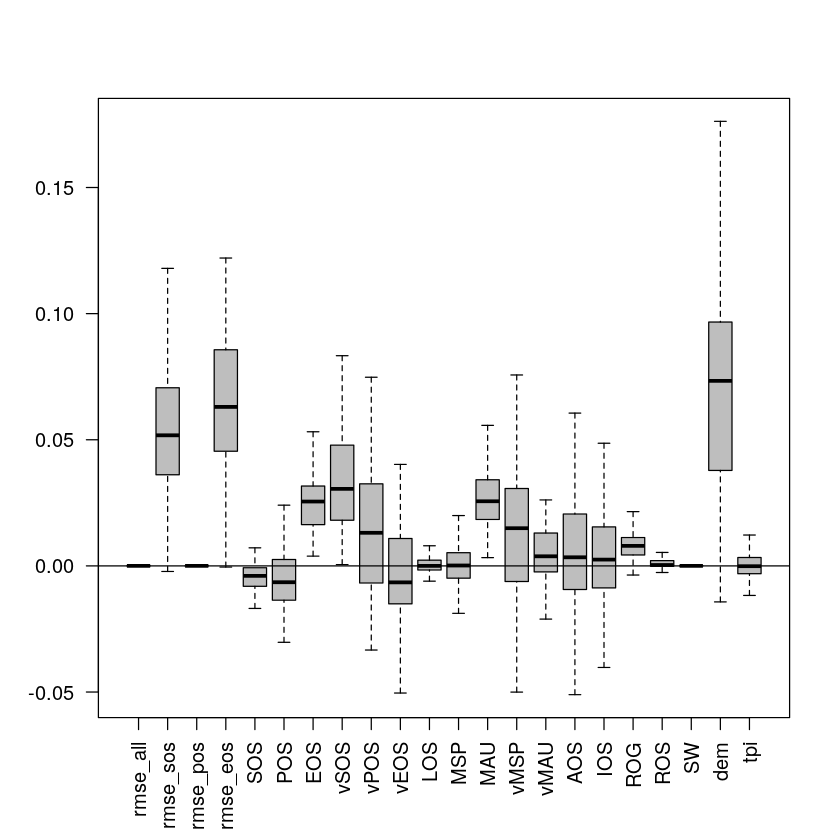

In [3]:
# svg('img_veg.svg', width = 12, height = 3)
boxplot(imp_veg, col='gray', outline=FALSE, las=2)
abline(0,0)
# dev.off()

In [45]:
svg('imp_veg_matrix.svg')
varImp(apply(imp_veg,2,median))
dev.off()

png 
  2